In [3]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree


# Decision tree

In [4]:
from util.functions import impute_and_train

model_constructor = DecisionTreeClassifier

df_num = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_num ,model_constructor)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

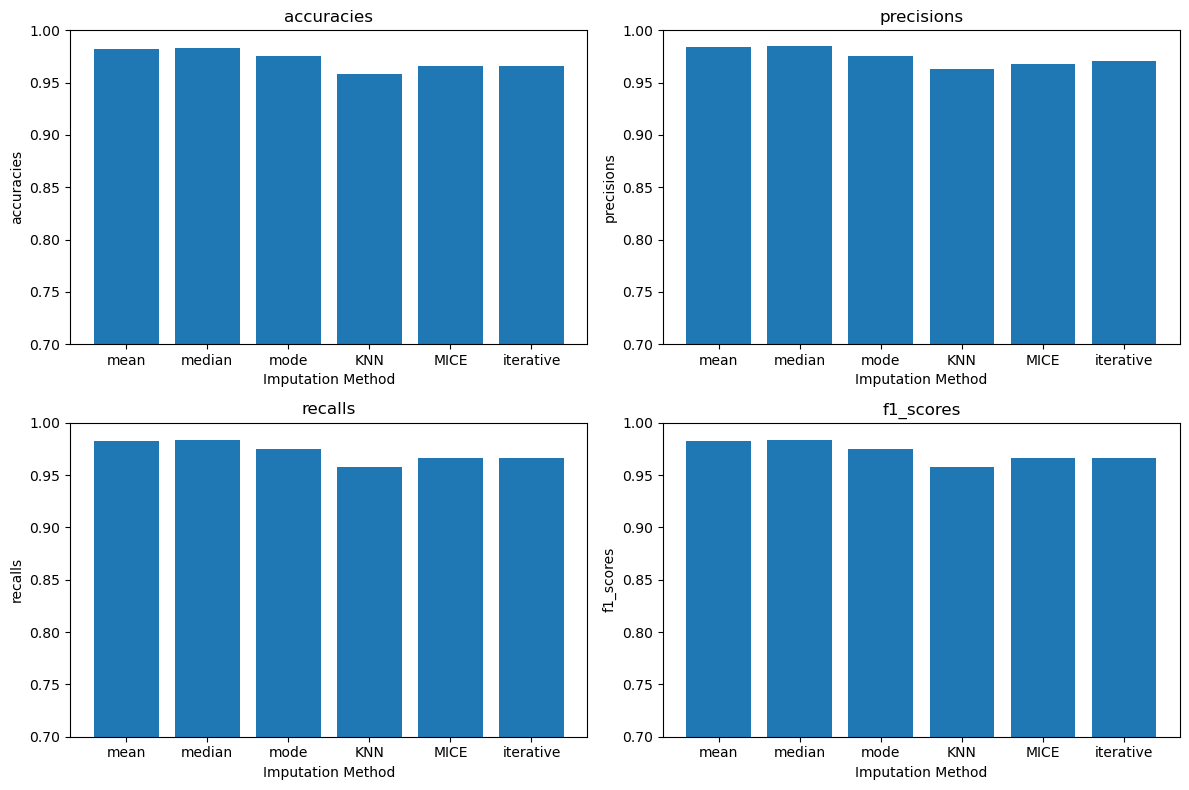

In [5]:
from util.functions import plot_metrics
metrics = results['metrics']
plot_metrics(results['metrics'])

    

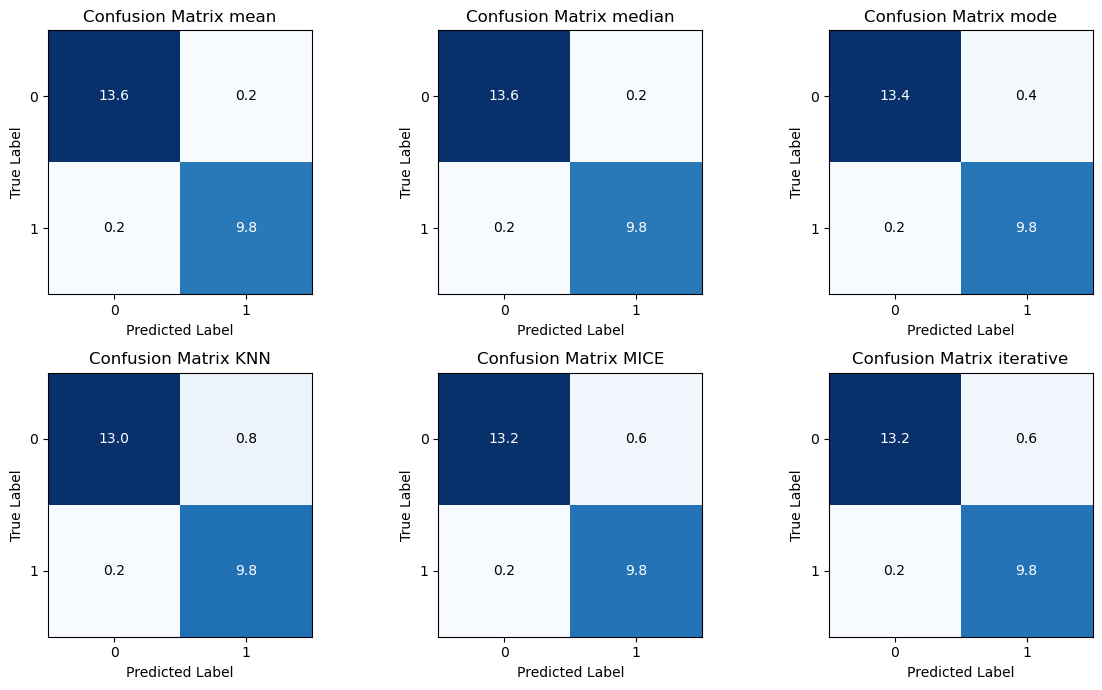

In [6]:
from util.functions import plot_mean_confusion_matrices
confusion_matrices = results['confusion_matrices']
plot_mean_confusion_matrices(confusion_matrices)

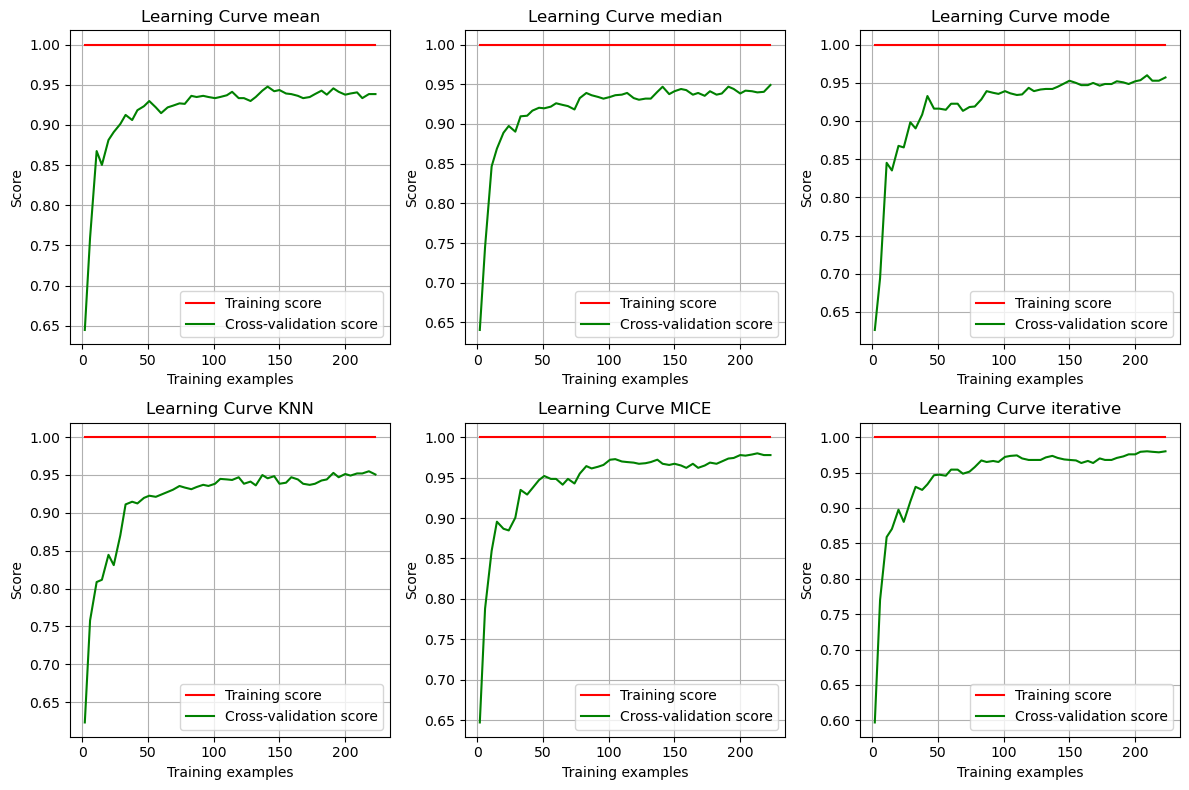

In [7]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

feature importances for iteration 0


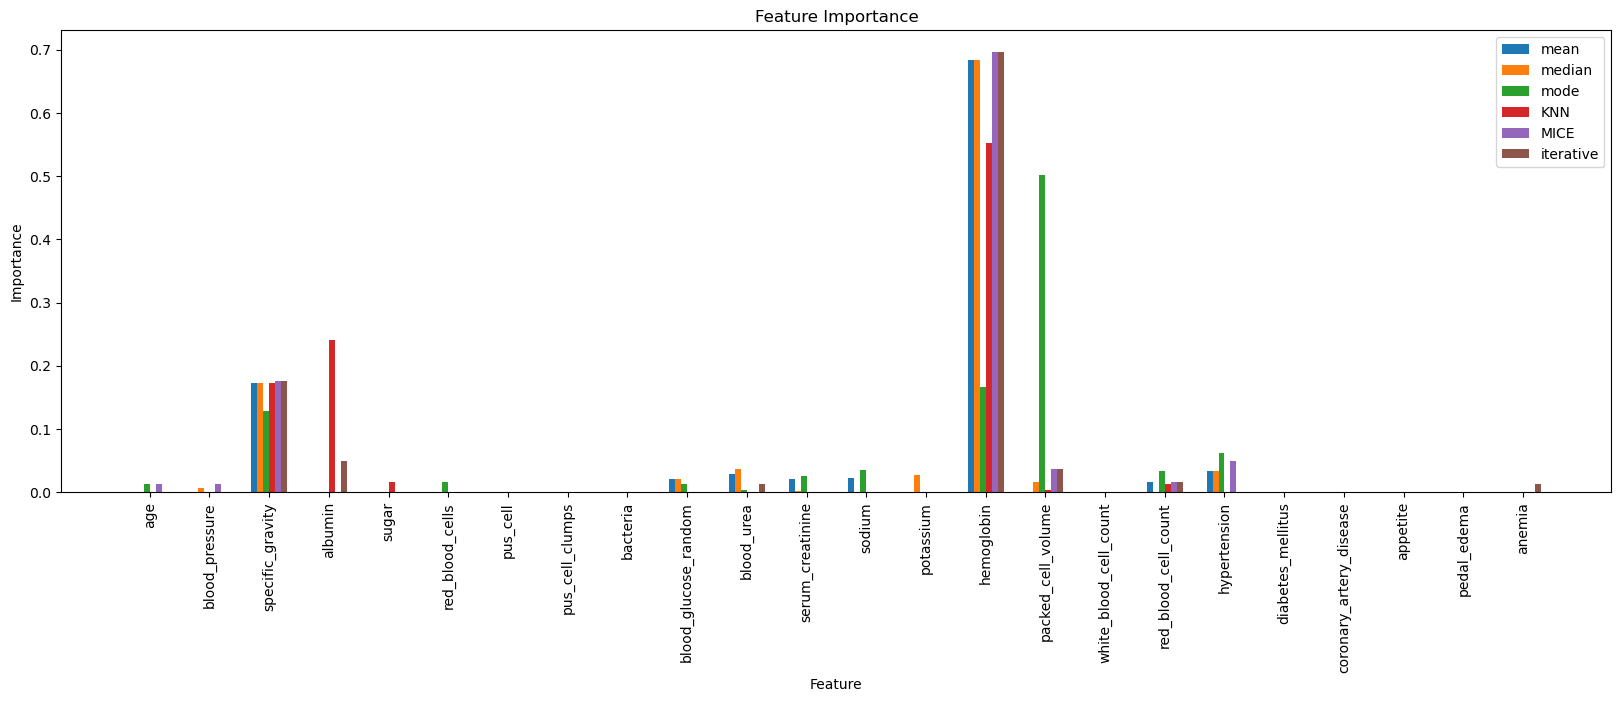

feature importances for iteration 1


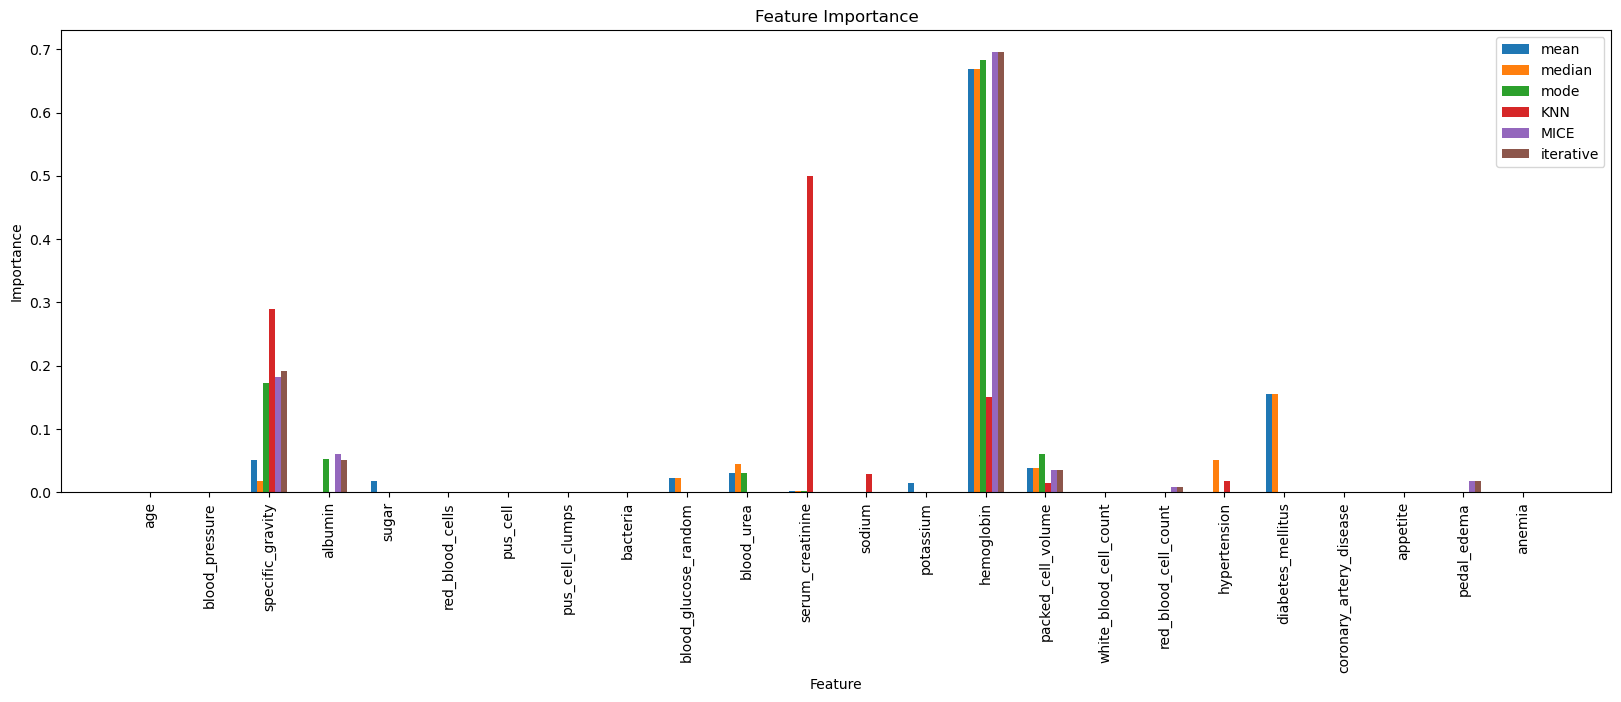

feature importances for iteration 2


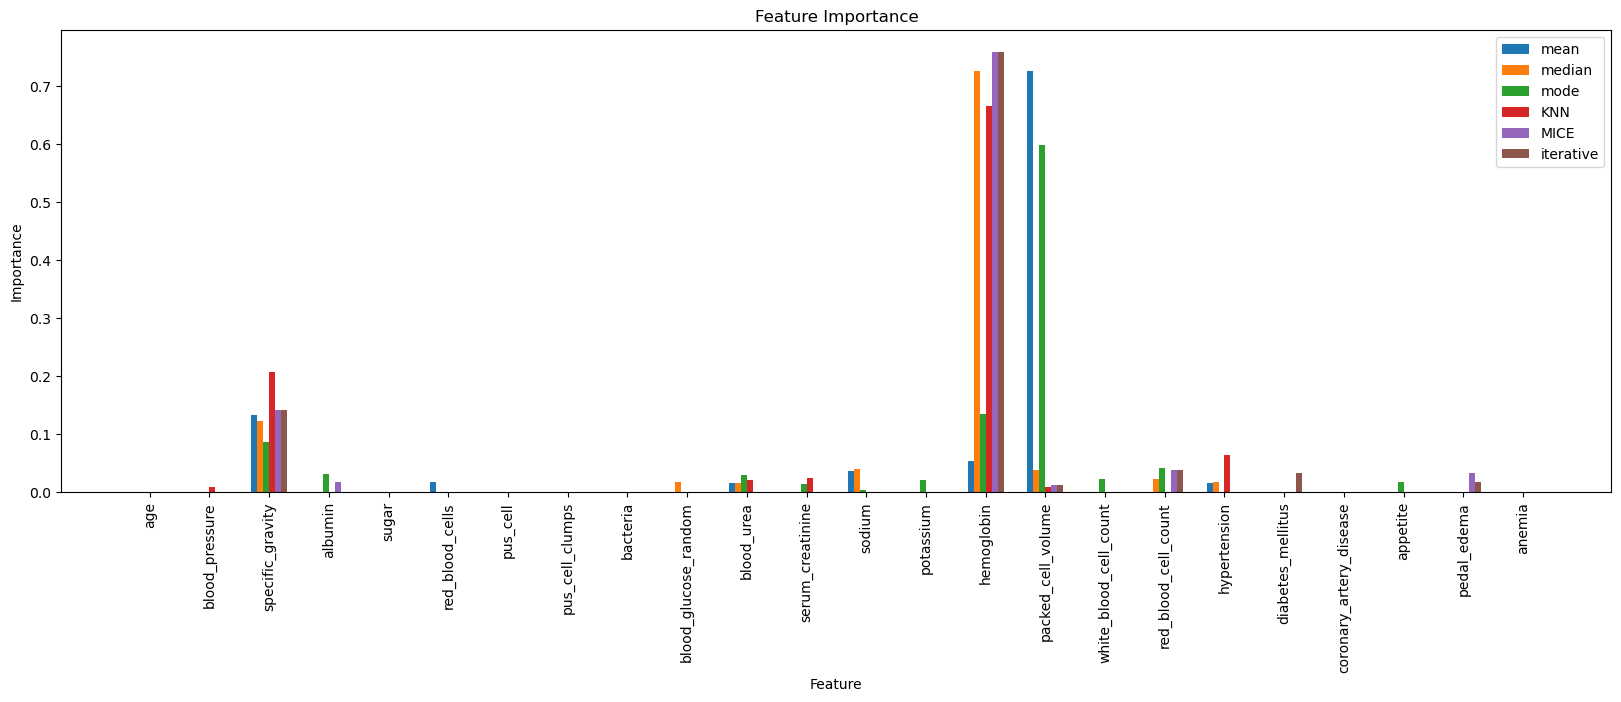

feature importances for iteration 3


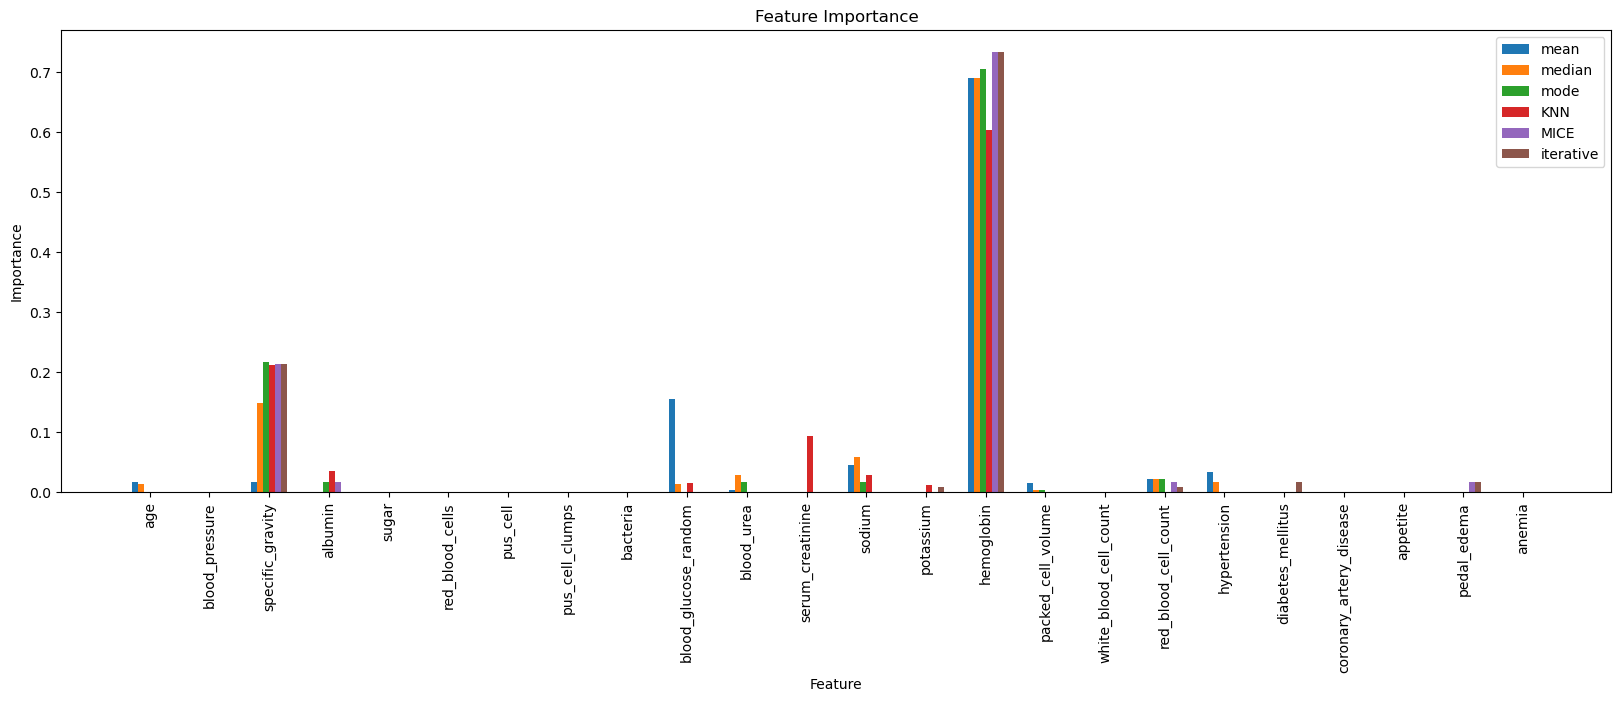

feature importances for iteration 4


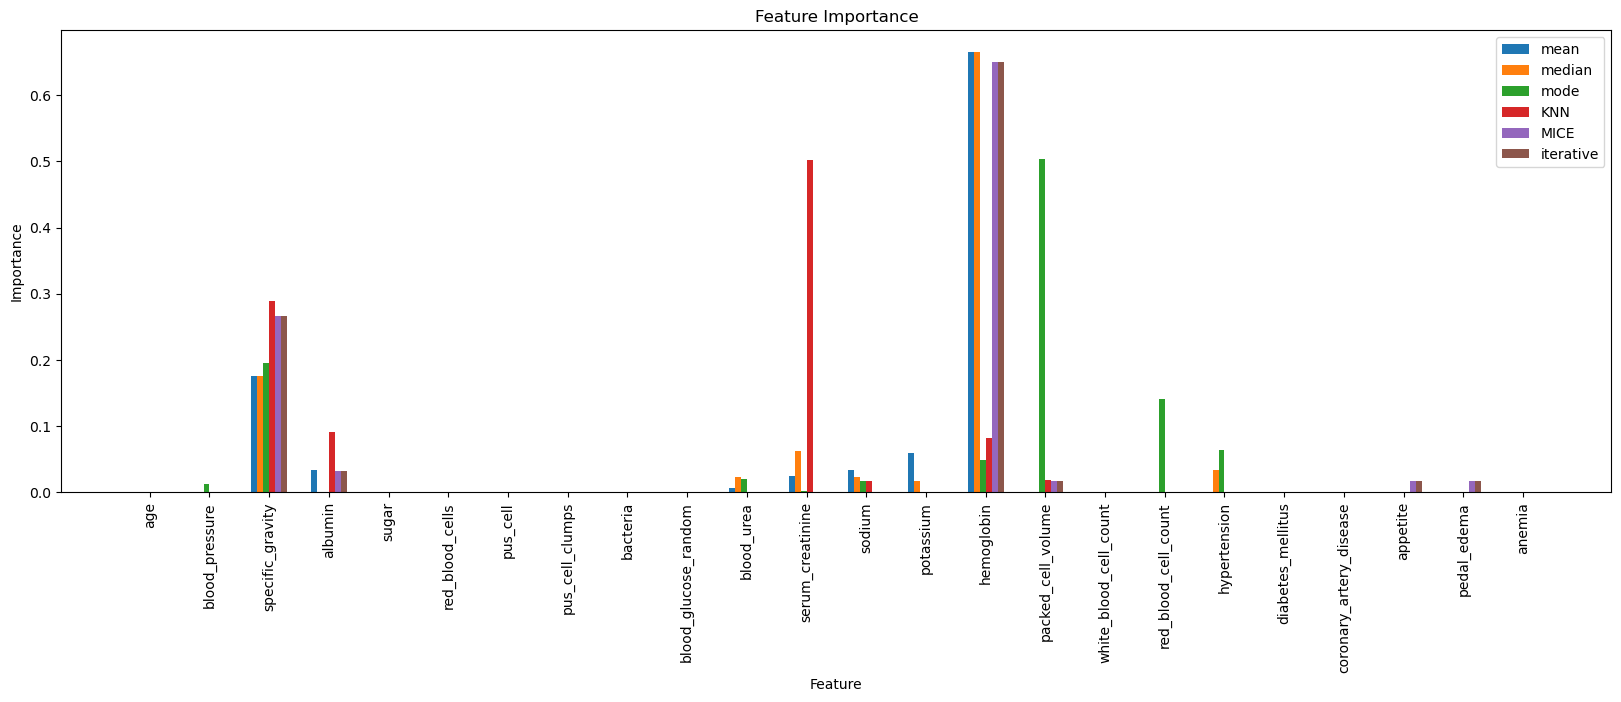

In [8]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
all_feature_importances = {}
for i in range(5):
    for (name, models) in results['models'].items():
        feature_importances[name] = pd.DataFrame(models[i].feature_importances_, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

    print('feature importances for iteration', i)
    plot_feature_importances(feature_importances)


#### Mean feature importances across models

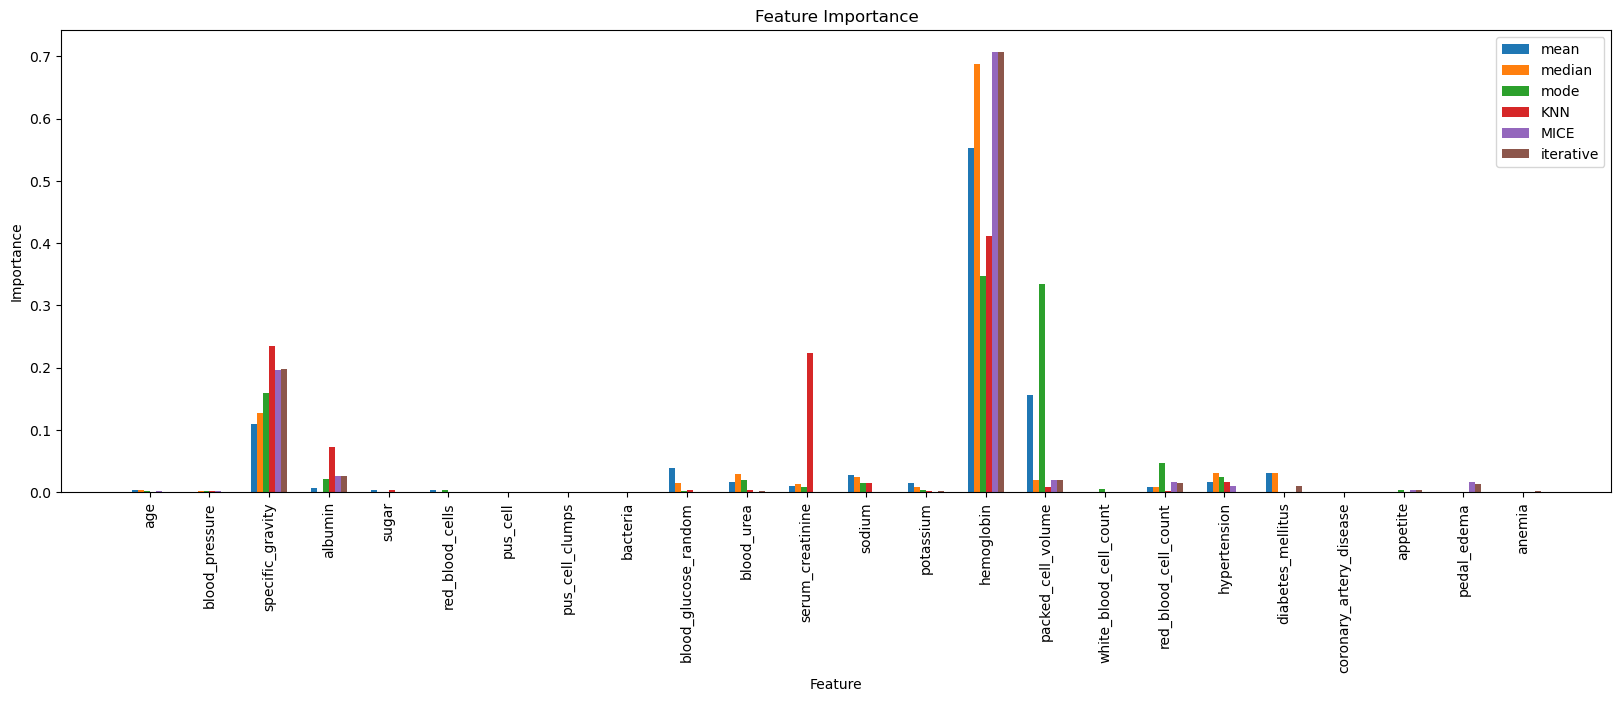

In [9]:
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        fi.append(model.feature_importances_)

    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

plot_feature_importances(feature_importances)

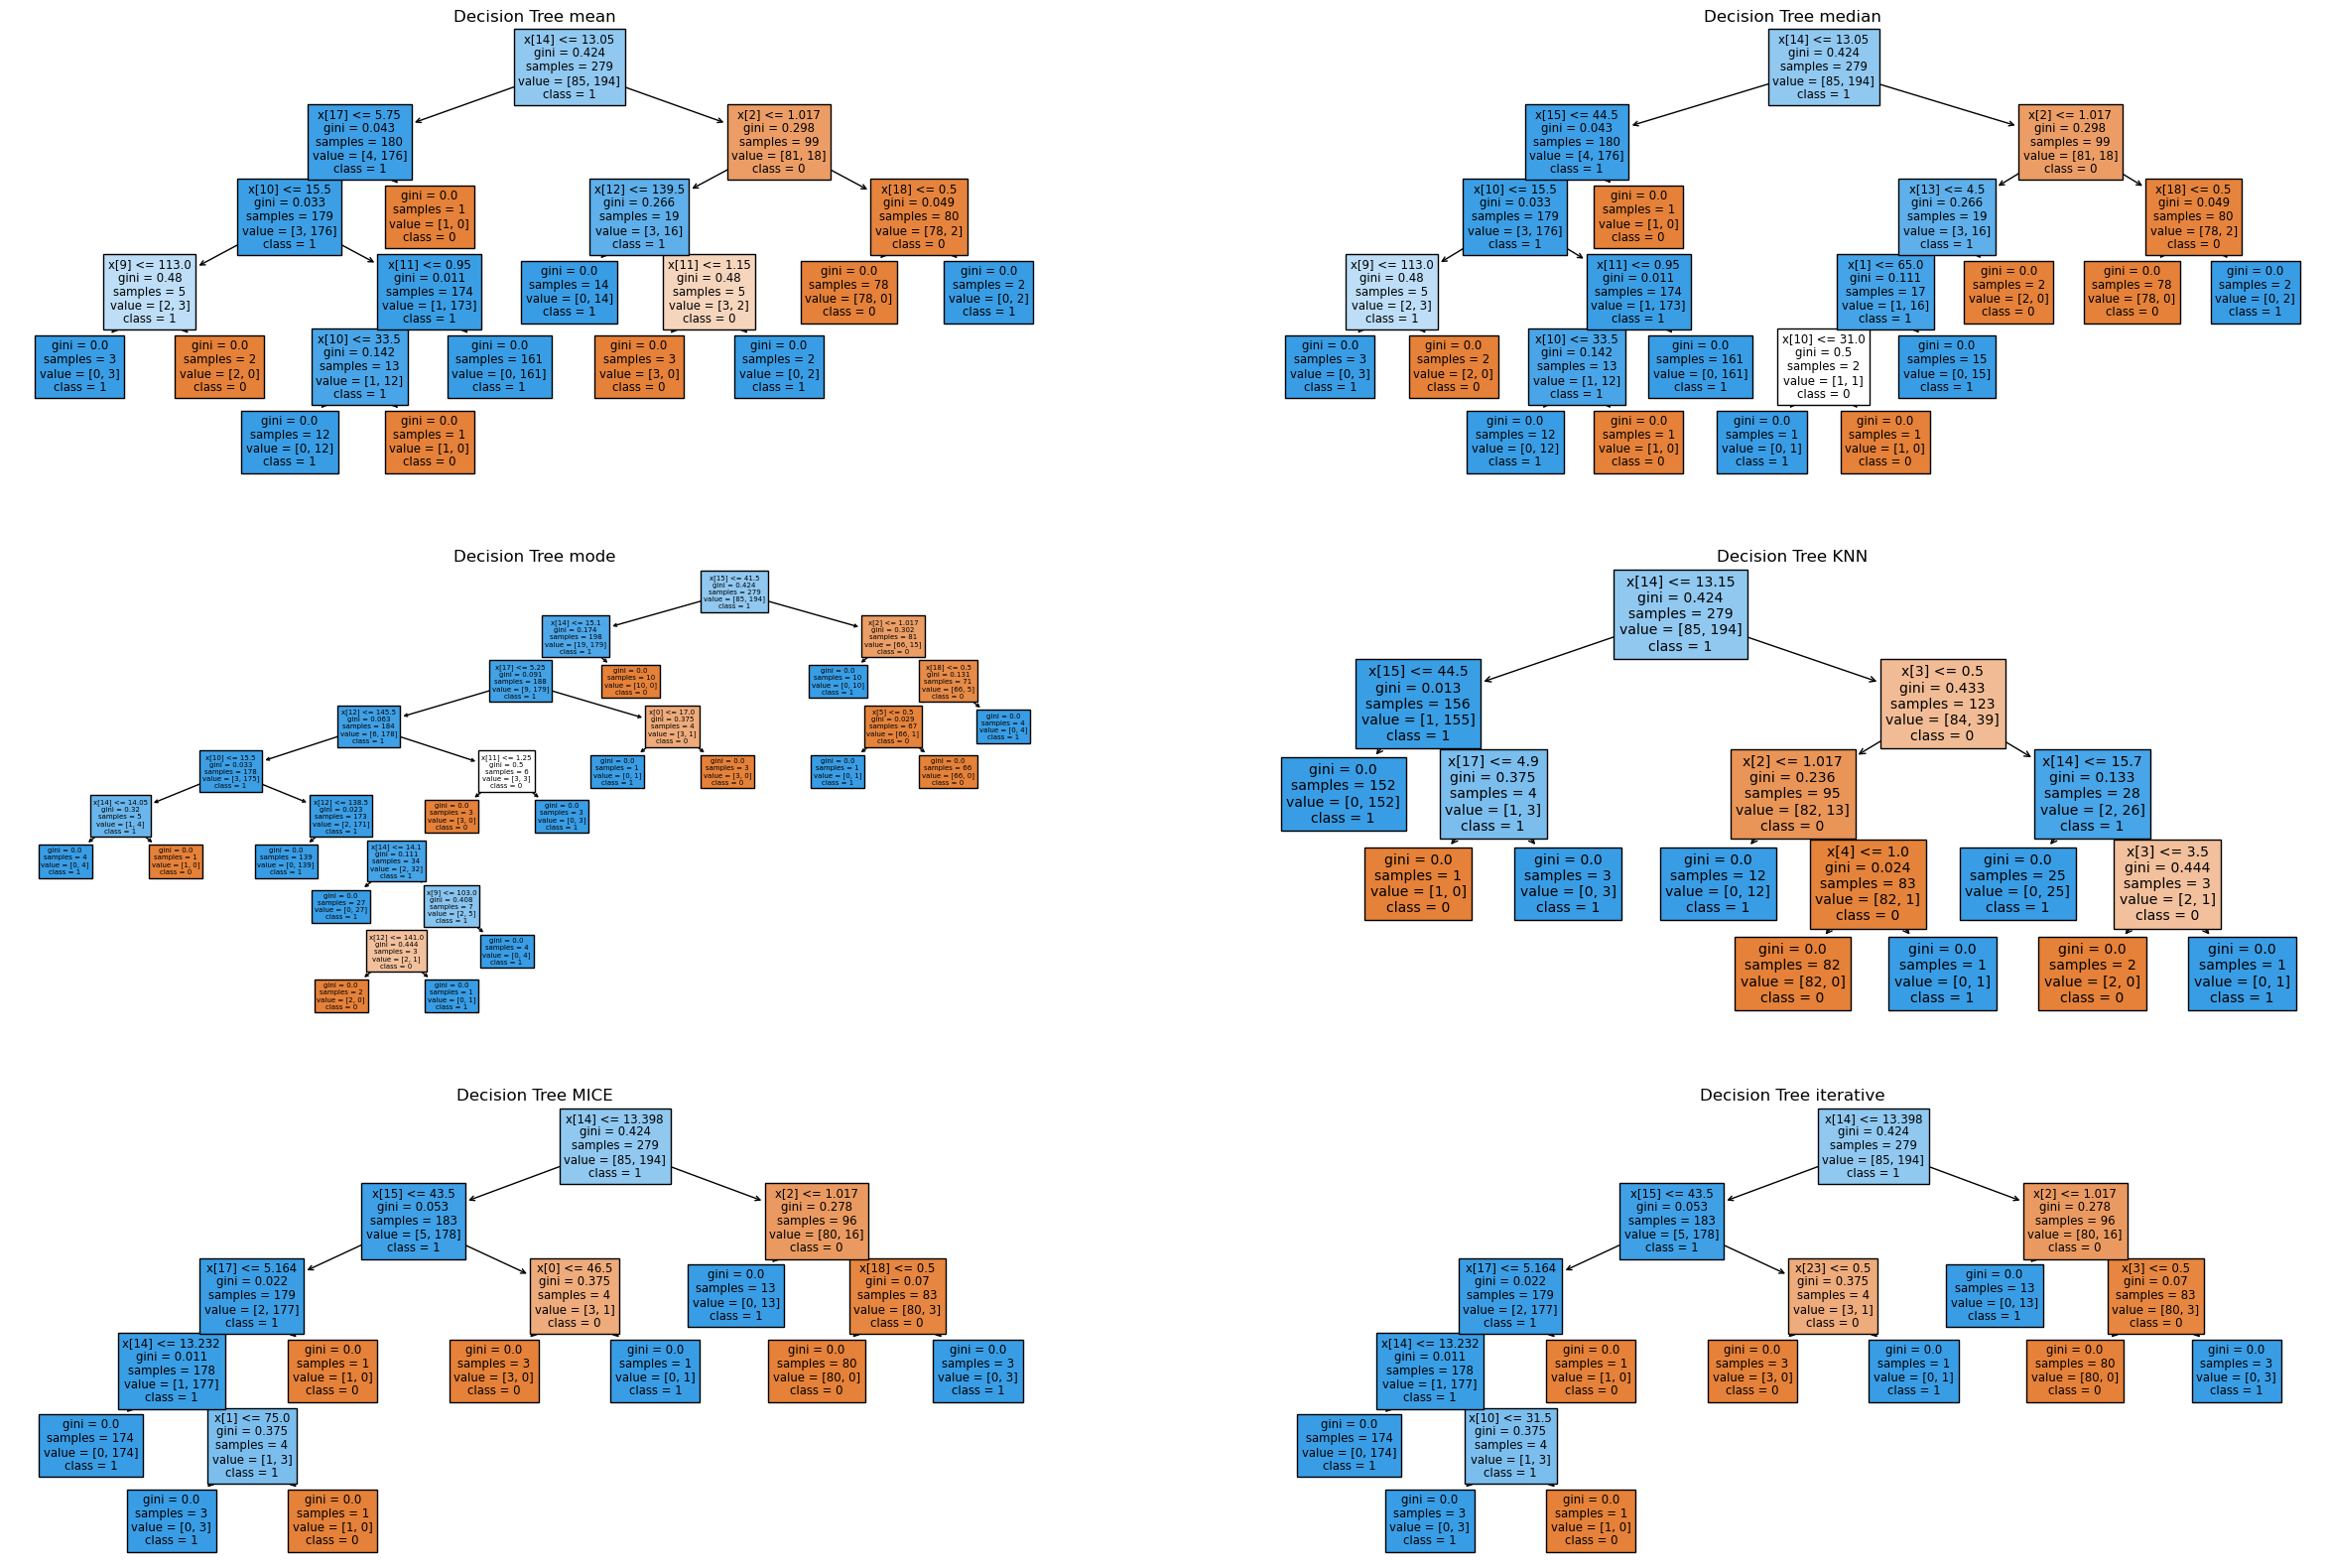

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

df_numeric = pd.read_csv('processed/df_numeric.csv')
for i, (name, models) in enumerate(results['models'].items()):
    
    model = models[0]
    plot_tree(model, ax=axs.flat[i], class_names=['0', '1'], filled=True)
    axs.flat[i].set_title(f'Decision Tree {name}')

In [16]:
metrics_dtree = results['metrics']

metrics_dtree = pd.DataFrame(metrics_dtree)


for col in metrics_dtree.columns:
    print(col)

m = []
for col in metrics_dtree.columns:
    m.append(metrics_dtree[col])

#print(m)

l = []

for i in range(4):
    for j in m[i]:
        l.append(j)

mean = []

for i in l:
    mean.append(np.mean(i))

print(mean)

print(mean[6:12])

mean_dict = {
    'accuracies': mean[0:6],
    'precisions': mean[6:12],
    'recalls': mean[12:18],
    'f1_scores': mean[18:24]
}

mean_df = pd.DataFrame(mean_dict)


mean_df.to_csv('metrics_dtree.csv', index= False)

accuracies
precisions
recalls
f1_scores
[0.9825757575757577, 0.9832167832167833, 0.975, 0.9582497212931995, 0.9663043478260869, 0.9659420289855074, 0.9843434343434343, 0.9846317425264793, 0.9756944444444443, 0.963066634928763, 0.9678683574879227, 0.9705561045234958, 0.9825757575757577, 0.9832167832167833, 0.975, 0.9582497212931995, 0.9663043478260869, 0.9659420289855074, 0.9827188787973101, 0.9831633525751172, 0.9750144927536232, 0.9582368027059893, 0.966386642935842, 0.9662012823462099]
[0.9843434343434343, 0.9846317425264793, 0.9756944444444443, 0.963066634928763, 0.9678683574879227, 0.9705561045234958]
